# First Look at the data
Here we take a first look at the data, calculate some statistics and make some plots. We also make some decisions about which features to retain and create a cleaned dataset.

In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
sns.set(font='Lato', font_scale=1.5)

### Read data and rename headers so they are more descriptive

In [165]:
data_path = '../data/bank-full.csv'

In [166]:
full_df = pd.read_csv(data_path, ';')
full_df.columns=['age', 'occupation', 'maritalStatus', 'education', 'hasCreditDefault', 'balance', 'hasHousingLoan', 'hasPersonalLoan',
                'contactMethod', 'contactDay', 'contactMonth', 'contactDurationInSec', 'numContactsPerformed','daysSinceLastContact',
                'numPrevContact', 'prevOutcome', 'subscribed']

### Some stats for the numeric features

In [36]:
frames = [full_df.describe().T, full_df[full_df['subscribed'] == 'no'].describe().T, full_df[full_df['subscribed'] == 'yes'].describe().T]

In [53]:
pd.concat(frames, keys=['all', 'no', 'yes'])

age        balance    contactDay  contactDurationInSec  \
all count  45211.000000   45211.000000  45211.000000          45211.000000   
    mean      40.936210    1362.272058     15.806419            258.163080   
    std       10.618762    3044.765829      8.322476            257.527812   
    min       18.000000   -8019.000000      1.000000              0.000000   
    25%       33.000000      72.000000      8.000000            103.000000   
    50%       39.000000     448.000000     16.000000            180.000000   
    75%       48.000000    1428.000000     21.000000            319.000000   
    max       95.000000  102127.000000     31.000000           4918.000000   
no  count  39922.000000   39922.000000  39922.000000          39922.000000   
    mean      40.838986    1303.714969     15.892290            221.182806   
    std       10.172662    2974.195473      8.294728            207.383237   
    min       18.000000   -8019.000000      1.000000              0.000000   
    25%       33.000000      58.000000      8.000000             95.000000   
    50%       39.000000     417.000000     16.000000            164.000000   
    75%       48.000000    1345.000000     21.000000            279.000000   
    max       95.000000  102127.000000     31.000000           4918.000000   
yes count   5289.000000    5289.000000   5289.000000           5289.000000   
    mean      41.670070    1804.267915     15.158253            537.294574   
    std       13.497781    3501.104777      8.501875            392.525262   
    min       18.000000   -3058.000000      1.000000              8.000000   
    25%       31.000000     210.000000      8.000000            244.000000   
    50%       38.000000     733.000000     15.000000            426.000000   
    75%       50.000000    2159.000000     22.000000            725.000000   
    max       95.000000   81204.000000     31.000000           3881.000000   

           numContactsPerformed  daysSinceLastContact  numPrevContact  
all count          45211.000000          45211.000000    45211.000000  
    mean               2.763841             40.197828        0.580323  
    std                3.098021            100.128746        2.303441  
    min                1.000000             -1.000000        0.000000  
    25%                1.000000             -1.000000        0.000000  
    50%                2.000000             -1.000000        0.000000  
    75%                3.000000             -1.000000        0.000000  
    max               63.000000            871.000000      275.000000  
no  count          39922.000000          39922.000000    39922.000000  
    mean               2.846350             36.421372        0.502154  
    std                3.212767             96.757135        2.256771  
    min                1.000000             -1.000000        0.000000  
    25%                1.000000             -1.000000        0.000000  
    50%                2.000000             -1.000000        0.000000  
    75%                3.000000             -1.000000        0.000000  
    max               63.000000            871.000000      275.000000  
yes count           5289.000000           5289.000000     5289.000000  
    mean               2.141047             68.702968        1.170354  
    std                1.921826            118.822266        2.553272  
    min                1.000000             -1.000000        0.000000  
    25%                1.000000             -1.000000        0.000000  
    50%                2.000000             -1.000000        0.000000  
    75%                3.000000             98.000000        1.000000  
    max               32.000000            854.000000       58.000000

## Make some plots

no     39922
yes     5289
Name: subscribed, dtype: int64

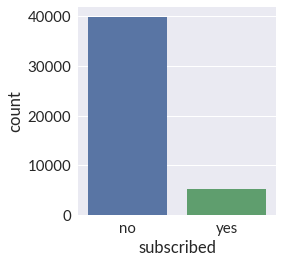

In [80]:
target = full_df['subscribed']
g = sns.factorplot("subscribed", data=full_df, kind='count', size=4, aspect=1)
target.value_counts()

### Use Seaborn's factor plot to visualise categorical features and their relationship with subscription status

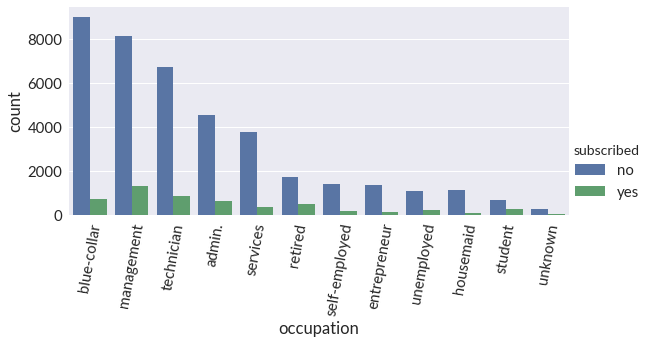

In [42]:
# Occupation
order = full_df['occupation'].value_counts().index.values
g1 = sns.factorplot("occupation", hue='subscribed', data=full_df, order=order, kind='count', size=4, aspect=2)
g1.set_xticklabels(rotation=80)

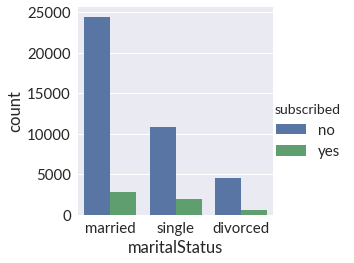

In [43]:
# Marital status
g2 = sns.factorplot("maritalStatus", hue='subscribed', data=full_df, kind='count', size=4, aspect=1)

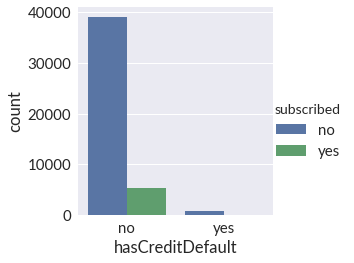

In [45]:
# Credit default
g3 = sns.factorplot("hasCreditDefault", hue='subscribed', data=full_df, kind='count', size=4, aspect=1)

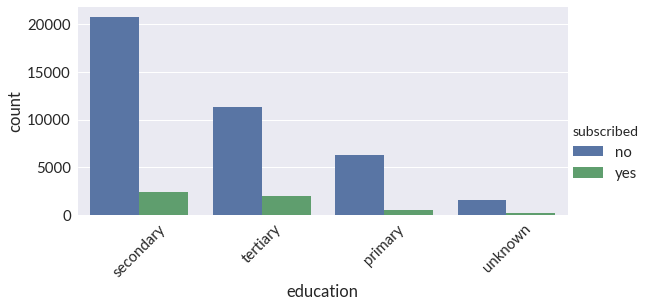

In [47]:
# education
order = full_df['education'].value_counts().index.values
g = sns.factorplot("education", hue='subscribed', data=full_df, order=order, kind='count', size=4, aspect=2)
g.set_xticklabels(rotation=45)

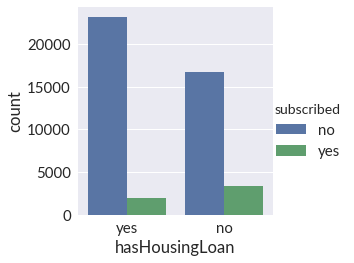

In [50]:
# housing loan
g5 = sns.factorplot("hasHousingLoan", hue='subscribed', data=full_df, kind='count', size=4, aspect=1)

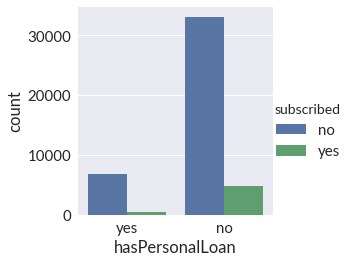

In [51]:
# personal loan
order=['yes', 'no']
g6 = sns.factorplot("hasPersonalLoan", hue='subscribed', data=full_df, kind='count', order=order, size=4, aspect=1)

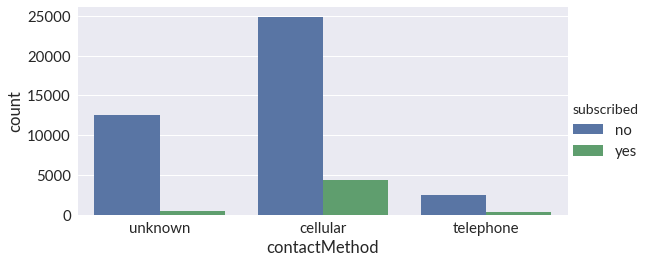

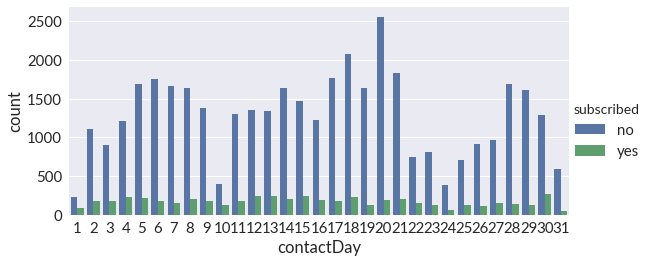

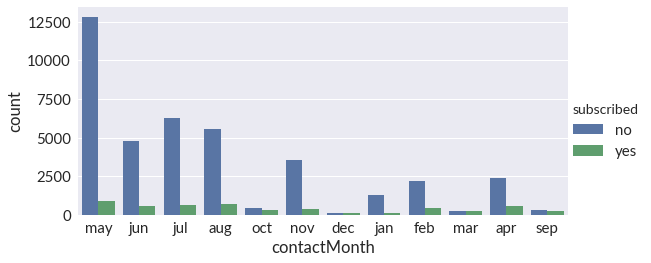

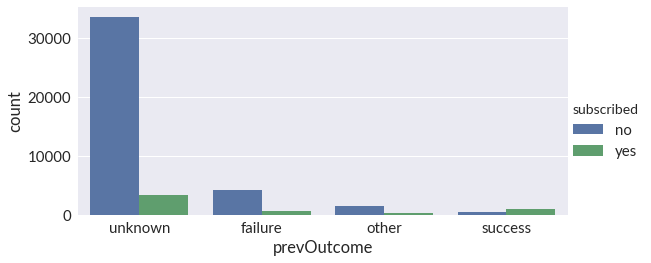

In [52]:
# contact method
g7 = sns.factorplot("contactMethod", hue='subscribed', data=full_df, kind='count', size=4, aspect=2)

# We've decided to leave out contact day
g8 = sns.factorplot("contactDay", hue='subscribed', data=full_df, kind='count', size=4, aspect=2)

# Contact month
g9 = sns.factorplot("contactMonth", hue='subscribed', data=full_df, kind='count',size=4, aspect=2)

# contact 
g3 = sns.factorplot('prevOutcome', data=full_df, hue='subscribed', kind='count', size=4, aspect=2)

### Bin age into groups

In [116]:
bins = [0, 30, 40, 50, 100]
labels = ['<30', '30-40', '40-50', '>50']
full_df['age_binned'] = pd.cut(full_df['age'], bins=bins, labels=labels)

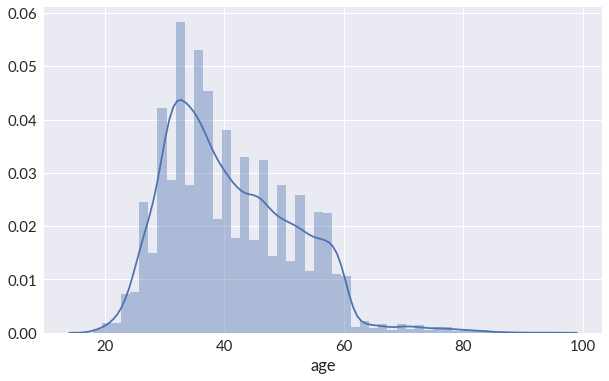

In [46]:
sns.distplot(full_df['age'])

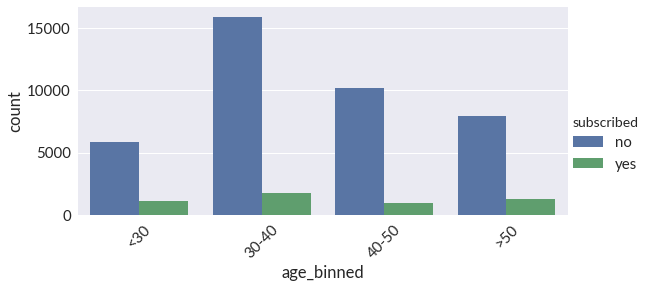

In [117]:
g = sns.factorplot("age_binned", hue='subscribed', data=full_df, kind='count', size=4, aspect=2)
g.set_xticklabels(rotation=45)

In [126]:
bins = [-1, 0, 1, 2, 5, 100]
labels = ['0', '1', '2', '3-5', '>5']
full_df['numPrevContact_binned'] = pd.cut(full_df['numPrevContact'], bins=bins, labels=labels)

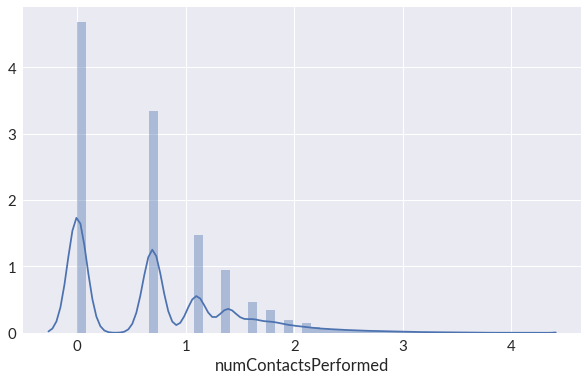

In [49]:
sns.distplot(np.log(full_df['numContactsPerformed']))

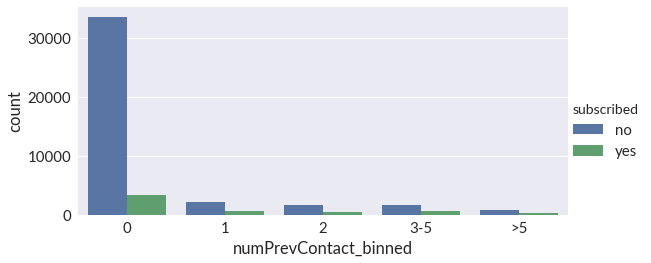

In [127]:
sns.factorplot("numPrevContact_binned", hue='subscribed', data=full_df, kind='count', size=4, aspect=2)

### Plots for numeric features
For numeric features, we divide the data into `subscribed` and `not subscribed` sections and plot the distribution of each.

In [85]:
subscribed = full_df[full_df['subscribed'] == 'yes']
not_subscribed = full_df[full_df['subscribed'] == 'no']

In [104]:
subscribed_limited_balance=subscribed[subscribed['balance'] <= 1.e4]
not_subscribed_limited_balance = not_subscribed[not_subscribed['balance'] <= 1.e4]

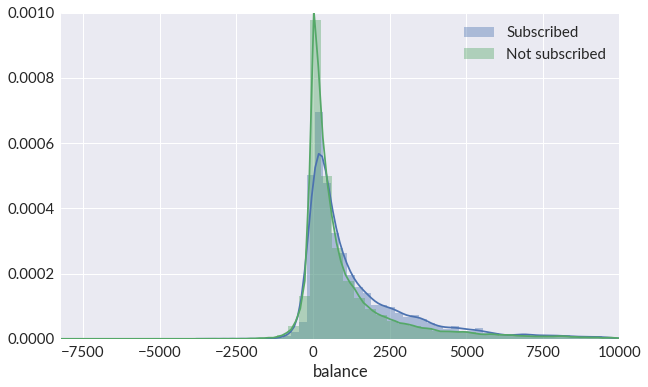

In [112]:
# balance
sns.distplot(subscribed_limited_balance["balance"], label='Subscribed')
sns.distplot(not_subscribed_limited_balance['balance'], label='Not subscribed')
plt.xlim([-8200, 10000])
plt.ylim([0, 0.001])
plt.legend()

Skewed distribution - need to work out some way of dealing with this.

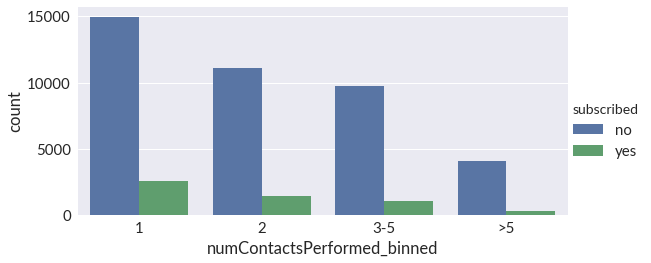

In [125]:
bins = [0, 1, 2, 5, 100]
labels = ['1', '2', '3-5', '>5']
full_df['numContactsPerformed_binned'] = pd.cut(full_df['numContactsPerformed'], bins=bins, labels=labels)
g = sns.factorplot('numContactsPerformed_binned', data=full_df, hue='subscribed', kind='count', size=4, aspect=2)

### Days since last contact
This is interesting - seems to be peaks at 4 month, 6 months and one year.

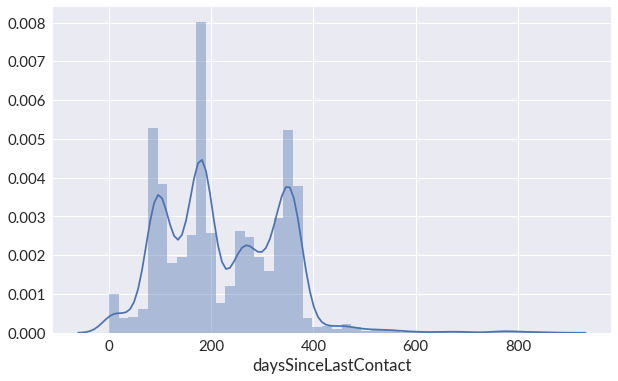

In [132]:
sns.distplot(full_df[full_df['daysSinceLastContact'] > 0]['daysSinceLastContact'])

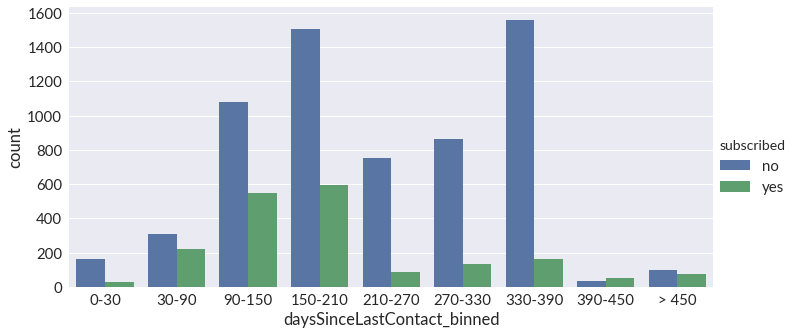

In [152]:
bins = [0, 30, 90, 150, 210, 270, 330, 390, 450, 10000]
labels = ['0-30', '30-90', '90-150',  '150-210', '210-270', '270-330', '330-390', '390-450', "> 450"]
full_df['daysSinceLastContact_binned'] = pd.cut(full_df['daysSinceLastContact'], bins=bins, labels=labels)
g = sns.factorplot('daysSinceLastContact_binned', data=full_df, hue='subscribed', kind='count', size=5, aspect=2)